# 다리를 건너는 트럭

## - 문제설명

트럭 여러 대가 강을 가로지르는 일차선 다리를 정해진 순으로 건너려 합니다. 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 알아내야 합니다. 다리에는 트럭이 최대 bridge_length대 올라갈 수 있으며, 다리는 weight 이하까지의 무게를 견딜 수 있습니다. 단, 다리에 완전히 오르지 않은 트럭의 무게는 무시합니다.

예를 들어, 트럭 2대가 올라갈 수 있고 무게를 10kg까지 견디는 다리가 있습니다. 무게가 [7, 4, 5, 6]kg인 트럭이 순서대로 최단 시간 안에 다리를 건너려면 다음과 같이 건너야 합니다.

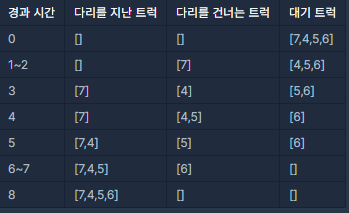

따라서, 모든 트럭이 다리를 지나려면 최소 8초가 걸립니다.

solution 함수의 매개변수로 다리에 올라갈 수 있는 트럭 수 bridge_length, 다리가 견딜 수 있는 무게 weight, 트럭 별 무게 truck_weights가 주어집니다. 이때 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 return 하도록 solution 함수를 완성하세요.

## - 제한 사항

* bridge_length는 1 이상 10,000 이하입니다.
* weight는 1 이상 10,000 이하입니다.
* truck_weights의 길이는 1 이상 10,000 이하입니다.
* 모든 트럭의 무게는 1 이상 weight 이하입니다.

## - 입출력 예

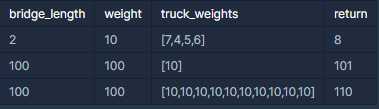

### 풀이 1 - Queue 

문제 설명을 보면서 다리 위 상황을 어떻게 나타내면 좋을지 생각하니 먼저 들어간 트럭이 먼저 나오는 것을 보고 큐로 풀어야겠다라고 생각했고, 처음 다리 위 상황을 만들어 내기 위해 큐에 다리 길이만큼 0을 추가해주었다.

우선 다리 위 상황을 기준으로 잡고 이 큐가 비어지게 되면 트럭이 모두 다리를 지나간 상황이므로 반복문을 종료하도록 했다.

In [1]:
def solution(bridge_length, weight, truck_weights):
    answer = 0
    bridge = [0 for _ in range(bridge_length)]
    while bridge:
        answer += 1
        bridge.pop(0)
        if truck_weights:
            if sum(bridge) + truck_weights[0] <= weight:
                bridge.append(truck_weights.pop(0))
            else:
                bridge.append(0)
    return answer

In [2]:
solution(2, 10, [7, 4, 5, 6]) # 8

8

In [3]:
solution(100, 100, [10]) # 101

101

In [4]:
solution(100, 100, [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]) # 110

110

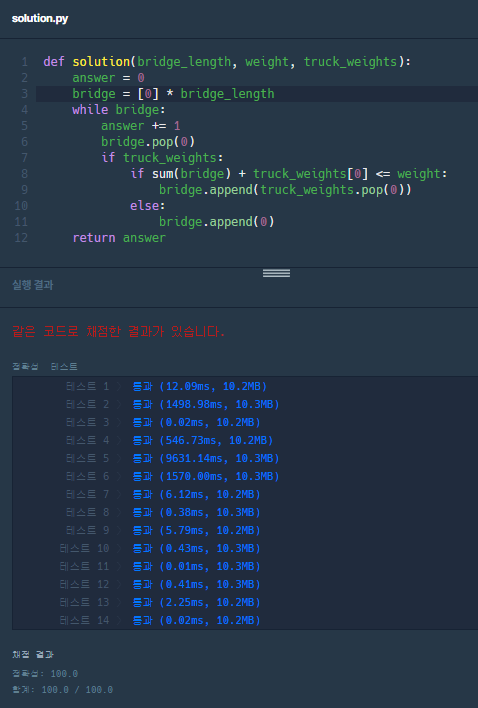

### 풀이 2 - Queue

위 풀이의 결과를 보니 시간이 너무 오래 걸리는 것을 확인할 수 있었다.
그래서 시간 복잡도를 확인해보았다.
현재 while문은 O(n)이고, 파이썬 리스트의 연산 작업 또한 O(n)이다
거기서 sum(brige)에 의해 O(n)이 생긴다.
이러한 것들 때문에 시간이 오래 걸리는 것 같아서 좀 수정해보기로 했다.

##### - 해결 방안
일단 sum 메서드를 사용하지 않고, 다리 위에 올라간 트럭의 무게를 저장시킬 변수(w)를 하나 생성하고 다리 위에 올라갔다면 올라간 트럭의 무게를 w에 더 해주고, 다리를 지나갔다면 큐에서 트럭을 빼면서 해당 트럭의 무게만큼 빼주면 될 것 같다.

그리고 리스트 연산 작업 때문에 시간이 걸리는 것을 줄이기 위해 collenctions의 deque를 사용하여 큐를 만들어 popleft()로 빠르게 연산할 수 있도록 한다.


In [5]:
def solution(bridge_length, weight, truck_weights):
    from collections import deque
    answer, w = 0, 0
    bridge = deque([0 for _ in range(bridge_length)])
    
    while bridge:
        answer += 1
        w -= bridge.popleft()
        if truck_weights:
            if w + truck_weights[0] <= weight:
                w += truck_weights[0]
                bridge.append(truck_weights.pop(0))
            else:
                bridge.append(0)
    return answer

In [6]:
solution(2, 10, [7, 4, 5, 6]) # 8

8

In [7]:
solution(100, 100, [10]) # 101

101

In [8]:
solution(100, 100, [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]) # 110

110

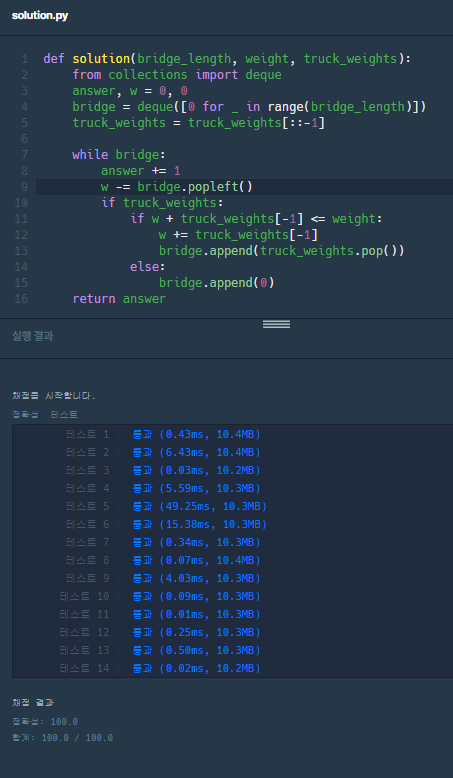

### 풀이 3 - Queue

위 결과를 보면 풀이 1때보다 시간이 많이 줄어든 것이 보인다.

풀이 2에서는 다리 위 상황을 기준으로 잡고 while을 잡았다면, 이번에는 대기 중인 트럭을 기준으로 잡고 while을 돌려보려고 한다.

기본적으로 while문 안의 구성은 위 풀이와 같다.

하지만 마지막 트럭이 다리 위에 올라갔을 때 while문을 끝낼지 지나갈 때까지 기다릴지가 다른 점이다.

그래서 무의미하게 기다리는 것을 없애기 위해 while의 기준을 대기 중인 트럭으로 잡으면 된다.

이후 시간은 마지막 전 트럭이 올라가고 마지막 트럭이 올라갈 때까지 걸린 시간(answer) + 마지막 트럭이 다리를 지나갈 때까지 걸리는 시간(bridge_length)를 더해서 리턴해주면 된다.

In [9]:
def solution(bridge_length, weight, truck_weights):
  from collections import deque
  answer, w = 0, 0 # 시간, 다리 위에 올라간 트럭 무게
  queue = deque([0 for _ in range(bridge_length)])

  while truck_weights:
    answer += 1
    w -= queue.popleft()
    if w + truck_weights[0] <= weight:
      w += truck_weights[0]
      queue.append(truck_weights.pop(0))
    else:
      queue.append(0)

  return answer+bridge_length

In [10]:
solution(	2, 10, [7, 4, 5, 6]) # 8

8

In [11]:
solution(100, 100, [10]) # 101

101

In [12]:
solution(100, 100, [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]) # 110

110

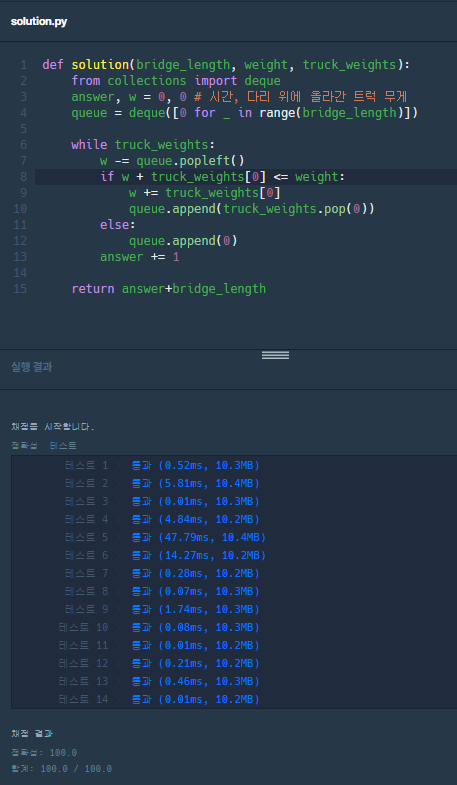